# 第2章 预备知识

## 2.1 数据操作

### 练习2.1.1

运行本节中的代码。将本节中的条件语句`X == Y`更改为`X < Y`或`X > Y`，然后看看你可以得到什么样的张量。

**解答：** 

&emsp;&emsp;将`X == Y`语句改为`X < Y`或`X > Y`，运行代码后，会返回和 X 大小相同的张量，对于每个位置，如果 X 的当前位置元素小于（大于）Y 的当前位置元素，则新张量中相应项的值为`True`， 反之为`False`。

In [2]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

In [4]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [5]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

### 练习2.1.2

用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

**解答：** 

- 能否得到预期结果要看两个张量的shape是否满足广播机制
- 广播机制条件
    1. 每个张量至少有一个维度
    2. 广播时, 从右往左对比两个张量的shape, 需满足shape一样且大小匹配或shape不一样且大小不匹配的位置任意有一个张量为1或shape不一样且不匹配位置任意有一个张量不存在

In [6]:
#二维情况
print('二维情况')
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
print(a, b, a+b)

二维情况
tensor([[0],
        [1],
        [2]]) tensor([[0, 1]]) tensor([[0, 1],
        [1, 2],
        [2, 3]])


In [7]:
#三维情况
print('三维情况')
# shape一样且大小匹配
a = torch.arange(6).reshape((3,2,1))
b = torch.arange(6).reshape((3,2,1))
a, b, a+b

三维情况


(tensor([[[0],
          [1]],
 
         [[2],
          [3]],
 
         [[4],
          [5]]]),
 tensor([[[0],
          [1]],
 
         [[2],
          [3]],
 
         [[4],
          [5]]]),
 tensor([[[ 0],
          [ 2]],
 
         [[ 4],
          [ 6]],
 
         [[ 8],
          [10]]]))

In [8]:
# shape不一样且大小不匹配的位置任意有一个张量为1
a = torch.arange(3).reshape((1,3,1))
b = torch.arange(9).reshape((3,1,3))
a, b, a+b

(tensor([[[0],
          [1],
          [2]]]),
 tensor([[[0, 1, 2]],
 
         [[3, 4, 5]],
 
         [[6, 7, 8]]]),
 tensor([[[ 0,  1,  2],
          [ 1,  2,  3],
          [ 2,  3,  4]],
 
         [[ 3,  4,  5],
          [ 4,  5,  6],
          [ 5,  6,  7]],
 
         [[ 6,  7,  8],
          [ 7,  8,  9],
          [ 8,  9, 10]]]))

In [9]:
# shape不一样且不匹配位置任意有一个张量不存在
a = torch.arange(3).reshape((1,3))
b = torch.arange(9).reshape((3,1,3))
a, b, a+b

(tensor([[0, 1, 2]]),
 tensor([[[0, 1, 2]],
 
         [[3, 4, 5]],
 
         [[6, 7, 8]]]),
 tensor([[[ 0,  2,  4]],
 
         [[ 3,  5,  7]],
 
         [[ 6,  8, 10]]]))

## 2.2 数据预处理

创建包含更多行和列的原始数据集。

In [10]:
import os
import pandas as pd

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('id,MSSubClass,MSZoning,LotFrontage,NumRooms,Alley,Price\n')  # 列名
    f.write('1,60,RL,65,NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,70,NA,70,2,NA,106000\n')
    f.write('3,NA,NA,80,4,NA,178100\n')
    f.write('4,NA,NA,90,NA,NA,140000\n')
    
original_data = pd.read_csv(data_file)
original_data

,id,MSSubClass,MSZoning,LotFrontage,NumRooms,Alley,Price
0,1,60.0,RL,65,NaN,Pave,127500
1,2,70.0,NaN,70,2.0,NaN,106000
2,3,NaN,NaN,80,4.0,NaN,178100
3,4,NaN,NaN,90,NaN,NaN,140000


### 练习2.2.1

删除缺失值最多的列。

**解答：** 

&emsp;&emsp;通过观察，可以看到 MSZoning 和 Alley 列的缺失值一样多，需要考虑到缺失值最多的列有多个的情况使用`original_data.isna().sum()[original_data.isna().sum() == original_data.isna().sum().max()].index.tolist()`得到最多缺失值的列名, 再进行删除

In [11]:
original_data.isna().sum()[original_data.isna().sum() == original_data.isna().sum().max()].index.tolist()

['MSZoning', 'Alley']

In [12]:
data = original_data.drop(original_data.isna().sum()[original_data.isna().sum() == original_data.isna().sum().max()].index.tolist(), axis=1)
data

,id,MSSubClass,LotFrontage,NumRooms,Price
0,1,60.0,65,NaN,127500
1,2,70.0,70,2.0,106000
2,3,NaN,80,4.0,178100
3,4,NaN,90,NaN,140000


### 练习2.2.2

将预处理后的数据集转换为张量格式。

**解答：** 

&emsp;&emsp;使用`torch.tensor`方法，将数据集转换为张量格式。

In [13]:
# 将Alley列转换成one-hot编码
data = pd.get_dummies(data, dummy_na=True)
data

,id,MSSubClass,LotFrontage,NumRooms,Price
0,1,60.0,65,NaN,127500
1,2,70.0,70,2.0,106000
2,3,NaN,80,4.0,178100
3,4,NaN,90,NaN,140000


In [14]:
# 将数据集转换为张量格式
data=torch.tensor(data.values)
data

tensor([[1.0000e+00, 6.0000e+01, 6.5000e+01,        nan, 1.2750e+05],
        [2.0000e+00, 7.0000e+01, 7.0000e+01, 2.0000e+00, 1.0600e+05],
        [3.0000e+00,        nan, 8.0000e+01, 4.0000e+00, 1.7810e+05],
        [4.0000e+00,        nan, 9.0000e+01,        nan, 1.4000e+05]],
       dtype=torch.float64)

## 2.3 线性代数

### 练习2.3.1

证明一个矩阵$\mathbf{A}$的转置的转置是$\mathbf{A}$，即$(\mathbf{A}^\top)^\top = \mathbf{A}$。

**解答：**

&emsp;&emsp;假设存在$A^T = B, B^T = C$，根据矩阵转置的定义，可得：
$$
b_{ij} = a_{ji}，c_{ij} = b_{ji}
$$

易知：
$$
c_{ij} = b_{ji} = a_{ij}
$$
则：
$$
c_{ij} = a_{ij}
$$

根据矩阵定义，可得：
$$
C = A = B^T = (A^T)^T
$$

&emsp;&emsp;以下使用`torch`编程进行验证：

In [15]:
A = torch.arange(20).reshape(5, 4)
A.T.T==A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### 练习2.3.2 

给出两个矩阵$\mathbf{A}$和$\mathbf{B}$，证明“它们转置的和”等于“它们和的转置”，即$\mathbf{A}^\top + \mathbf{B}^\top = (\mathbf{A} + \mathbf{B})^\top$。

**解答：**

&emsp;&emsp;假设$C = A + B$，根据矩阵运算的定义可得：
$$
c_{ij} = a_{ij} + b_{ij}
$$
对矩阵$C$进行转置，将$i,j$进行互换，可得：
$$
c_{ij} = a_{ji} + b_{ji}
$$

根据矩阵定义，可得：
$$
C^T = A^T + B^T = (A + B)^T
$$

&emsp;&emsp;以下使用`torch`编程进行验证：

In [16]:
A = torch.rand(4,4)
B=torch.rand(4,4)
A.T+B.T==(A+B).T

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### 练习2.3.3

给定任意方阵$\mathbf{A}$，$\mathbf{A} + \mathbf{A}^\top$总是对称的吗？为什么？

**解答：**  

&emsp;&emsp;假设$B = A + A^T$，根据矩阵运算的定义可得：
$$
b_{ij} = a_{ij} + a_{ji}
$$

对矩阵$B$进行转置，将$i,j$进行互换，可得：
$$
b_{ji} = a_{ji} + a_{ij}
$$

根据矩阵定义，可得：
$$
B^T = A^T + A = (A + A^T)^T
$$

所以，根据对称矩阵的定义，给定任意方阵$A$，$A+A^T$是对称矩阵。

### 练习2.3.4

本节中定义了形状$(2,3,4)$的张量`X`。`len(X)`的输出结果是什么？

**解答：**

In [17]:
X = torch.arange(24).reshape(2, 3, 4)
len(X)

2

### 练习2.3.5 

对于任意形状的张量`X`,`len(X)`是否总是对应于`X`特定轴的长度?这个轴是什么?

**解答：** 

`len(X)`对应于`X`的轴0的长度，以下使用代码验证：

In [18]:
n = int(torch.rand(1) * 10) + 1
m = int(torch.rand(1) * 10) + 1
X = torch.rand(n, m)
torch.tensor([len(X), len(X)]) == torch.tensor(X.shape)

tensor([ True, False])

### 练习2.3.6

运行`A/A.sum(axis=1)`，看看会发生什么。请分析一下原因？

**解答：**

In [19]:
A = torch.arange(20).reshape(5, 4) 
try:
    A/A.sum(axis=1)
except Exception as e:
    print(e)

The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1


代码会报错, `A.sum(axis=1)`得到的结果比`A`少一个轴且与`A`的轴1长度不一致，无法广播，可以试着加上`keepdims=True`以达到想要的结果。

In [20]:
A = torch.arange(20).reshape(5, 4) 
A/A.sum(axis=1,keepdims=True)

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

### 练习2.3.7

考虑一个具有形状$(2,3,4)$的张量，在轴0、1、2上的求和输出是什么形状？

**解答：**

通过代码验证各轴上的求和输出的形状：

In [21]:
A = torch.arange(24).reshape(2,3,4) 
print(f'在轴0上的求和：{A.sum(axis=0).shape}\n在轴1上的求和：{A.sum(axis=1).shape}\n在轴2上的求和：{A.sum(axis=2).shape}')

在轴0上的求和：torch.Size([3, 4])
在轴1上的求和：torch.Size([2, 4])
在轴2上的求和：torch.Size([2, 3])


### 练习2.3.8

为`linalg.norm`函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么？

**解答：** 在哪个轴上求和哪个轴就消失 

In [22]:
x = torch.randn(2, 3, 4)

In [23]:
# 计算不同维度上的范数
norm_dim0 = torch.linalg.norm(x, dim=0)
print(norm_dim0.shape)

norm_dim1 = torch.linalg.norm(x, dim=1)
print(norm_dim1.shape)

norm_dim2 = torch.linalg.norm(x, dim=2)
print(norm_dim2.shape)

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


## 2.4 微积分

### 练习2.4.1 

绘制函数$\displaystyle y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。

**解答：**

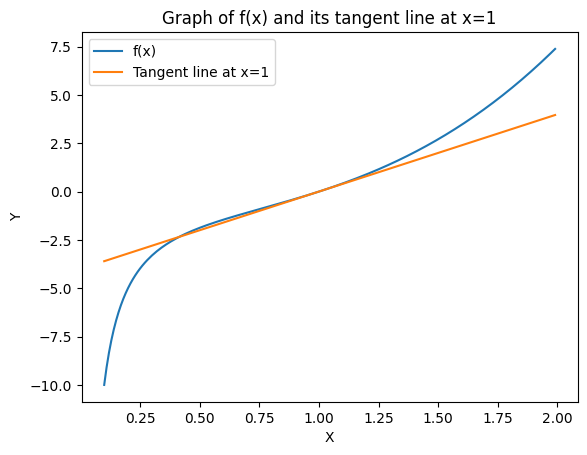

In [24]:
# 定义函数
def f(x):
    return x**3 - 1/x

# 定义x=point的切线
def f_tangent(f, x, point):
    h = 1e-4
    grad = (f(point+h) - f(point)) / h
    return grad*(x-point) + f(point)

# 绘制函数图像和切线
x = np.arange(0.1, 2.0, 0.01)
y = f(x)
y_tangent = f_tangent(f, x=x, point=1)
plt.plot(x,y, label='f(x)')
plt.plot(x,y_tangent, label='Tangent line at x=1')
plt.legend()
plt.title('Graph of f(x) and its tangent line at x=1')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 练习2.4.2

求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

**解答：**

&emsp;&emsp;根据梯度的定义：
$$
\frac{\partial{f(x)}}{\partial{x_1}} = 6 x_1 \\
\frac{\partial{f(x)}}{\partial{x_2}} = 5 e^{x_2}
$$

则：
$$
\frac{\partial{f(x)}}{\partial x} = (6 x_1, 5 e^{x_2})
$$

&emsp;&emsp;利用代码编程验证结果：

In [25]:
x = torch.arange(2.0, requires_grad=True)
y = 3*x[0]**2+ 5*torch.exp(x[1])
y.backward()

print("f(x)的梯度：", x.grad)
print("验证梯度：", x.grad==torch.tensor([6*x[0], 5*torch.exp(x[1])]))

f(x)的梯度： tensor([ 0.0000, 13.5914])
验证梯度： tensor([True, True])


### 练习2.4.3 

函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$ 的梯度是什么？

**解答：**

&emsp;&emsp;根据2-范数的定义，可得：
$$
f(x) = \|x\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}
$$

函数$f(x)$的梯度：
$$
\begin{aligned}
\frac{\partial{f}}{\partial{x}} 
&= \left( \frac{\partial{f}}{\partial{x_1}}, \frac{\partial{f}}{\partial{x_2}}, \cdots, \frac{\partial{f}}{\partial{x_n}}  \right) \\
&= \left(\frac{1}{2} \cdot 2 x_1 \cdot \left( \sum_{i=1}^n x_i^2 \right)^{-\frac{1}{2}}, \frac{1}{2} \cdot 2 x_2 \cdot \left( \sum_{i=1}^n x_i^2 \right)^{-\frac{1}{2}}, \cdots, \frac{1}{2} \cdot 2 x_n \cdot \left( \sum_{i=1}^n x_i^2 \right)^{-\frac{1}{2}} \right) \\
&= \left( \frac{x_1}{\sqrt{\sum_{i=1}^n x_i^2}},  \frac{x_2}{\sqrt{\sum_{i=1}^n x_i^2}}, \cdots, \frac{x_n}{\sqrt{\sum_{i=1}^n x_i^2}} \right) \\
&= \left( \frac{x_1}{\|x\|_2}, \frac{x_2}{\|x\|_2}, \cdots, \frac{x_n}{\|x\|_2} \right) \\
&= \frac{x}{\|x\|_2}
\end{aligned}
$$

利用代码编程验证结果：

In [26]:
x = torch.arange(4.0,requires_grad=True)
y = torch.dot(x, x).sqrt()
y.backward()
print("f(x)的梯度：", x.grad)
print("验证结果：", x.grad==x/(torch.dot(x, x).sqrt()))

f(x)的梯度： tensor([0.0000, 0.2673, 0.5345, 0.8018])
验证结果： tensor([True, True, True, True])


### 练习2.4.4

尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。

**解答：** 

&emsp;&emsp;根据链式求导法则，可得：
$$
\frac{\partial u}{\partial a}=\frac{\partial u}{\partial x} \frac{\partial x}{\partial a}+\frac{\partial u}{\partial y} \frac{\partial y}{\partial a}+\frac{\partial u}{\partial z} \frac{\partial z}{\partial a} \\
\frac{\partial u}{\partial b}=\frac{\partial u}{\partial x} \frac{\partial x}{\partial b}+\frac{\partial u}{\partial y} \frac{\partial y}{\partial b}+\frac{\partial u}{\partial z} \frac{\partial z}{\partial b}
$$

## 2.5 自动微分

### 练习2.5.1 

为什么计算二阶导数比一阶导数的开销要更大？

**解答：** 

&emsp;&emsp;在 PyTorch 中计算一阶导数和二阶导数都是通过自动微分机制实现的，但是计算二阶导数的开销通常要比计算一阶导数更大，原因如下：

1. 计算图的构建：在计算一阶导数时，PyTorch 只需要构建一次计算图，然后根据需要进行反向传播即可。而在计算二阶导数时，需要构建两次计算图，第一次是计算一阶导数，第二次是计算一阶导数的导数，也就是二阶导数。因此，计算二阶导数需要更多的计算图构建操作。
2. 内存占用：计算一阶导数时，PyTorch 只需要保留一阶导数的梯度值，而计算二阶导数时需要保留一阶导数和二阶导数的梯度值，这会占用更多的内存。
3. 计算量增加：计算二阶导数需要对一阶导数进行额外的计算，这增加了计算量和计算时间。

因此，计算二阶导数的开销通常要比计算一阶导数更大。

### 练习2.5.2 

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

**解答：**

In [27]:
x = torch.arange(4.0,requires_grad=True)
y = torch.dot(x, x).sqrt()
print(x)
y.backward()
print(x.grad)
try:
    y.backward()
    print(x.grad)
except Exception as e:
    print(e)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0.0000, 0.2673, 0.5345, 0.8018])
Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


根据上述运行结果，在运行反向传播函数之后，立即再次运行它，会报错，提示“尝试第二次反向传播（或者在释放保存的张量后直接访问它们）。调用.backward()或autograd.grad()时，将释放图中保存的中间值。如果需要第二次执行反向传播，或者在反向传播调用后需要访问保存的张量，请指定retain_graph=True。

In [28]:
x = torch.arange(4.0, requires_grad=True)
y = torch.dot(x, x).sqrt()
print(x)
y.backward(retain_graph=True)
print(x.grad)
try:
    y.backward()
    print(x.grad)
except Exception as e:
    print(e)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0.0000, 0.2673, 0.5345, 0.8018])
tensor([0.0000, 0.5345, 1.0690, 1.6036])


### 练习2.5.3 

在控制流的例子中，我们计算`d`关于`a`的导数，如果将变量`a`更改为随机向量或矩阵，会发生什么？

**解答：** 

In [29]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(1, 3), requires_grad=True)
d = f(a)
try:
    d.backward()
except Exception as e:
    print(e)

grad can be implicitly created only for scalar outputs


根据上述执行结果，如果将变量`a`更改为随机向量或矩阵，会报错，因为PyTorch只能对标量结果求梯度，可以将代码进行以下修改：

In [30]:
try:
    d.backward(torch.ones_like(d))
except Exception as e:
    print(e)
print(a.grad)

tensor([[102400., 102400., 102400.]])


### 练习2.5.4 

重新设计一个求控制流梯度的例子，运行并分析结果。

**解答：** 

In [31]:
def f(a):
    b = a * 2
    while b.norm(1) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c.sum()
a = torch.randn(size=(), requires_grad=True)
d = f(a)
print(a)
d.backward()
print(a.grad)

tensor(0.6885, requires_grad=True)
tensor(2048.)


### 练习2.5.5

使$f(x)=\sin(x)$，绘制$f(x)$和$\displaystyle \frac{df(x)}{dx}$的图像，其中后者不使用$f'(x)=\cos(x)$。

**解答：**

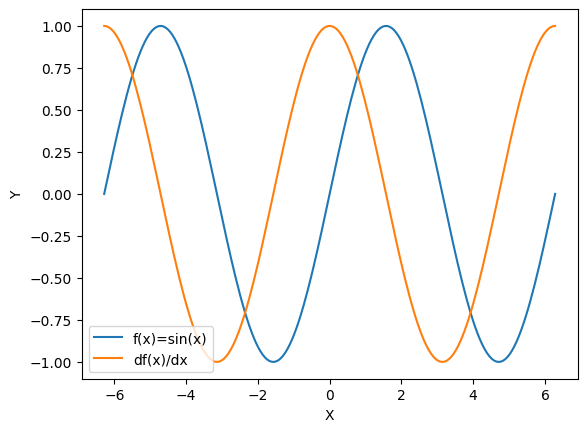

In [32]:
def f(x):
    return torch.sin(x)

def df(x):
    x.requires_grad_()
    y = f(x)
    y.backward(torch.ones_like(y))
    return x.grad

x = torch.linspace(-2*torch.pi, 2*torch.pi, 200)

y1 = f(x)
y2 = df(x)

plt.plot(x.detach().numpy(), y1.detach().numpy(), label='f(x)=sin(x)')
plt.plot(x.detach().numpy(), y2.detach().numpy(), label='df(x)/dx')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 2.6 概率

### 练习2.6.1 

进行$m=500$组实验，每组抽取$n=10$个样本。改变$m$和$n$，观察和分析实验结果。

**解答：** 抽取的样本越少达到需要的进行实验的组

In [33]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [34]:
fair_probs = torch.ones([6]) / 6
def experiment(n=10,m=500,legend=1):
    counts = multinomial.Multinomial(n, fair_probs).sample((m,))
    cum_counts = counts.cumsum(dim=0)
    estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

    d2l.set_figsize((6, 4.5))
    for i in range(6):
        d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
    d2l.plt.title(f'n={n},m={m}')
    d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    if legend==1:
        d2l.plt.legend();   

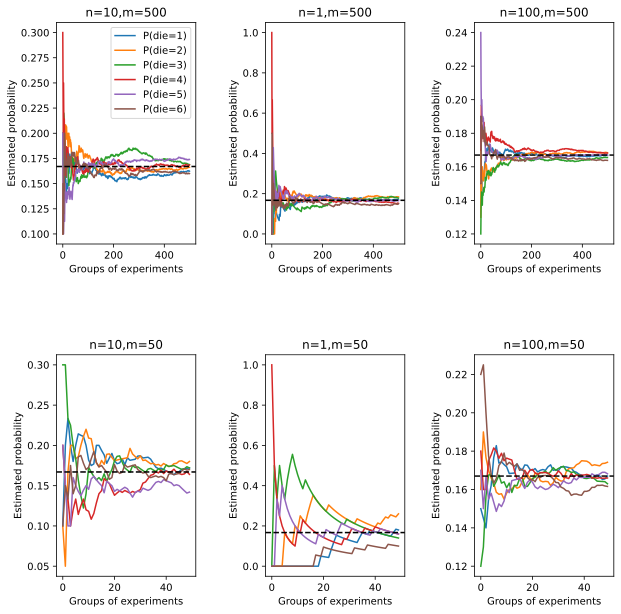

In [35]:
d2l.plt.figure(figsize=(10, 10)) 
d2l.plt.subplot(231)
experiment()
d2l.plt.subplot(232)
experiment(1,500,0)
d2l.plt.subplot(233)
experiment(100,500,0)

d2l.plt.subplot(234)
experiment(10,50,0)
d2l.plt.subplot(235)
experiment(1,50,0)
d2l.plt.subplot(236)
experiment(100,50,0)
d2l.plt.subplots_adjust(wspace =0.5, hspace =0.5)

### 练习2.6.2 

给定两个概率为$P(\mathcal{A})$和$P(\mathcal{B})$的事件，计算$P(\mathcal{A} \cup \mathcal{B})$和$P(\mathcal{A} \cap \mathcal{B})$的上限和下限。（提示：使用[友元图](https://en.wikipedia.org/wiki/Venn_diagram)来展示这些情况。)

**解答：**

&emsp;&emsp;$P(\mathcal{A} \cap \mathcal{B})$的上限是 $ \min(P(\mathcal{A}), P(\mathcal{B}))$，因为两个事件的交集的概率的上限不能超过两个事件中概率较小的那个。$P(\mathcal{A} \cap \mathcal{B})$的下限是 $0$，因为两个事件可以互斥。

所以
$$
0 \leqslant P(\mathcal{A} \cap \mathcal{B}) \leqslant \min (P(\mathcal{A}), P(\mathcal{B}))
$$

&emsp;&emsp;由于$P(\mathcal{A} \cup \mathcal{B})=P(\mathcal{A})+P( \mathcal{B})-P(\mathcal{A} \cap \mathcal{B})$，根据$P(\mathcal{A} \cap \mathcal{B})$的上下限，可以得到
$P(\mathcal{A} \cup \mathcal{B})$ 的上下限：

$$
\max(P(\mathcal{A}), P(\mathcal{B})) \leqslant P(\mathcal{A} \cup \mathcal{B}) \leqslant P(\mathcal{A}) + P(\mathcal{B})
$$

### 练习2.6.3

假设我们有一系列随机变量，例如$A$、$B$和$C$，其中$B$只依赖于$A$，而$C$只依赖于$B$，能简化联合概率$P(A, B, C)$吗？（提示：这是一个[马尔可夫链](https://en.wikipedia.org/wiki/Markov_chain)。)

**解答：**

&emsp;&emsp;根据题意，由于$B$只依赖于$A$，可知
$$
P(B | A, C) = P(B | A)
$$
由于$C$只依赖于$B$，可知
$$
P(C | A, B) = P(C | B)
$$

可得：
$$
\begin{aligned}
P(A, B, C)
&= P(C|A, B) P(A, B) \\
&= P(C|A, B) P(B|A) P(A) \\ 
&= P(C|B) P(B|A) P(A)
\end{aligned}
$$

则：
$$
P(A, B, C) = P(C | B) P(B | A) P(A)
$$

### 练习2.6.4

在2.6.2节中，第一个测试更准确。为什么不运行第一个测试两次，而是同时运行第一个和第二个测试？

**解答：** 

&emsp;&emsp;根据题意，如果同时运行第一个测试两次且他们互不影响。

$$
\begin{aligned}
& P(D_1 = 1, D_1 = 1 \mid H = 1) \\ 
=& ( P(D_1 = 1 \mid H = 1))^2 \\
=& 1 
\end{aligned}
$$

$$
\begin{aligned}
&P(D_1 = 1, D_1 = 1) \\
=& P(D_1 = 1, D_1 = 1, H = 0) + P(D_1 = 1, D_1 = 1, H = 1) \\
=& P(D_1 = 1, D_1 = 1 \mid H = 0) P(H=0) + P(D_1 = 1, D_1 = 1 \mid H = 1) P(H=1) \\
=& (P(D_1 = 1 \mid H = 0))^2 P(H=0) +( P(D_1 = 1 \mid H = 1))^2 P(H=1)\\
=& (0.01)^2 \times 0.9985 + 1 \times 0.0015 \\
=& 0.00159985 \\
\end{aligned}
$$

$$
\begin{aligned}
&P( H = 1 \mid D_1 = 1, D_1 = 1) \\
=& \frac{P(D_1 = 1, D_1 = 1 \mid H = 1) P(H=1)}{P(D_1 = 1, D_1 = 1)} \\
=& \frac{1 \times 0.0015}{0.00159985)} \\
=& 0.9375878988655186 \\
\end{aligned}
$$

&emsp;&emsp;根据得到的结果，高于同时运行第一个和第二个测试的概率值 ，但现实中我们不会让病人进行两次同种检验，另外如果进行相继两次的第一种测试，得到都为阳性的结果患者得病的概率为$1-(1-0.1307)^2 = 0.24431751000000002$